<a href="https://www.kaggle.com/code/mcadriaans/meta-stock-price-sql?scriptVersionId=184365565" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meta-stock-price-technical-indicators-10-years/meta_2014_2023.csv


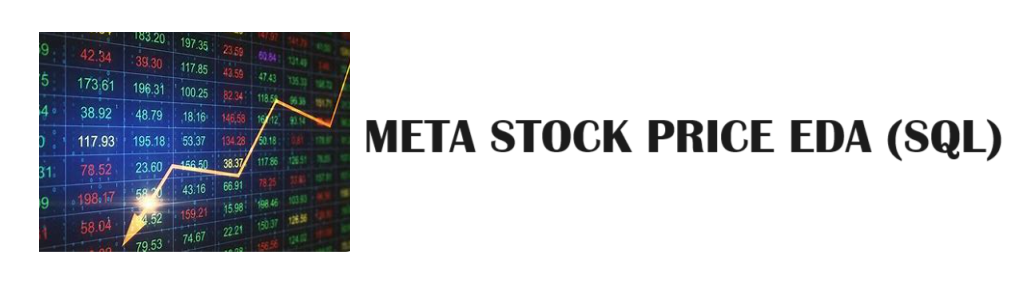

<div style="background-color:#Ffffe0; color: black; padding: 10px; border: 2px solid black;">
    <h1 style="text-align: center;">Load and Understand the Data </h1>
</div>

## <u>Install packages</u>

In [2]:
# This package integrates SQL with IPython Notebook
!pip install ipython-sql

## <u>Load Dependencies</u>

In [3]:
# Data manipulation and Data analysis
import pandas as pd   

# Provides a source od database connectivity
from sqlalchemy import create_engine

# Working with SQLite database in Python 
import sqlite3

## <u> Load data </u>

In [4]:
# Load csv file into DataFrame
data = pd.read_csv('/kaggle/input/meta-stock-price-technical-indicators-10-years/meta_2014_2023.csv')

In [5]:
# Get the first 5 rows 
data.head(10)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,54.830002,55.220001,54.189999,54.709999,43195500,51.917475,58.077822,-64.312117,-13.517101,50.2818,50.740946,47.6654,46.914555,1.828901,53.2450,1.030002,1.652052,1.710739,54.560001
1,2014-01-03,55.020000,55.650002,54.529999,54.560001,38246200,50.604988,57.387622,-40.054734,-17.361246,50.3194,50.890719,47.8288,47.066897,1.687987,53.5420,1.120003,1.576045,1.668543,57.200001
2,2014-01-06,54.419998,57.259998,54.049999,57.200001,68852600,67.483917,65.221525,43.907749,42.364730,50.4254,51.138151,48.0306,47.268784,1.768947,53.9850,3.209999,1.809467,1.778647,57.919998
3,2014-01-07,57.700001,58.549999,57.220001,57.919998,77207400,70.672584,67.003189,150.620136,117.886980,50.5348,51.404115,48.2433,47.480966,1.869653,54.4840,1.349998,1.743829,1.748030,58.230000
4,2014-01-08,57.599998,58.410000,57.230000,58.230000,56682400,72.049420,67.768804,107.795942,101.415192,50.6604,51.671806,48.4600,47.695073,1.951977,54.9535,1.180000,1.663282,1.707456,57.220001
5,2014-01-09,58.650002,58.959999,56.650002,57.220001,92253300,61.139242,62.667059,67.348891,72.506466,50.8002,51.889389,48.6614,47.884774,1.913662,55.3020,2.309997,1.755670,1.750495,57.939999
6,2014-01-10,57.130001,58.299999,57.060001,57.939999,42449500,65.485896,64.706800,56.148766,68.897572,50.9710,52.126676,48.8627,48.085014,1.919270,55.7300,1.239998,1.682002,1.714031,55.910000
7,2014-01-13,57.910000,58.250000,55.380001,55.910000,63010900,47.872555,55.499705,-32.374938,0.494863,51.1090,52.275046,49.0377,48.240824,1.739855,55.9340,2.869999,1.851716,1.796600,57.740002
8,2014-01-14,56.459999,57.779999,56.099998,57.740002,37503600,59.366740,60.900791,-11.118995,38.260302,51.2596,52.489364,49.2319,48.429949,1.725443,56.1550,1.869999,1.854328,1.801843,57.599998
9,2014-01-15,57.980000,58.570000,57.270000,57.599998,33663400,58.220894,60.297824,47.470053,71.421641,51.4166,52.689787,49.4224,48.612501,1.683320,56.3445,1.300000,1.775138,1.765997,57.189999


In [6]:
# Select specific columns for analysis
df = data[['date', 'open', 'high', 'low', 'close', 'volume']]

In [7]:
# Return column labels of the DataFrame
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [8]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2516 non-null   object 
 1   open    2516 non-null   float64
 2   high    2516 non-null   float64
 3   low     2516 non-null   float64
 4   close   2516 non-null   float64
 5   volume  2516 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [9]:
# Data dimensions
df.shape

(2516, 6)

<div style="background-color:#Ffffe0; color: black; padding: 10px; border: 2px solid black;">
    <h1 style="text-align: center;">SQL Queries </h1>
</div>

## <u>Load data into SQLite database and establishing a connection</u>

In [10]:
# Initialize a new engine that can interface with the SQLite database.
engine = create_engine('sqlite:///meta_2014_2023.db')

In [11]:
# Connect to the database
conn = engine.connect()

In [12]:
# Write DataFrame to SQL database
df.to_sql('meta_stock_price', engine, if_exists='replace', index=False)

2516

In [13]:
# Load SQL extension in the IPython environment
%load_ext sql 

# Connect to SQLite database: meta_2014_2023.db
%sql sqlite:///meta_2014_2023.db

In [14]:
%%sql
--# List all the tables in the database
SELECT 
    name 
FROM sqlite_master 
WHERE type='table';

 * sqlite:///meta_2014_2023.db
Done.


name
meta_stock_price


In [15]:
%%sql
-- Retrieving first 5 records from the 'meta_stock_price' table
SELECT *
FROM meta_stock_price 
LIMIT 5;

 * sqlite:///meta_2014_2023.db
Done.


date,open,high,low,close,volume
2014-01-02,54.830002,55.220001,54.189999,54.709999,43195500
2014-01-03,55.02,55.650002,54.529999,54.560001,38246200
2014-01-06,54.419998,57.259998,54.049999,57.200001,68852600
2014-01-07,57.700001,58.549999,57.220001,57.919998,77207400
2014-01-08,57.599998,58.41,57.23,58.23,56682400


<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">1.   Calculate the average closing price for each year</h2>
</div>

In [16]:
%%sql
SELECT
    strftime('%Y', date) AS year,
    AVG(close) AS avg_closing_price
FROM meta_stock_price
GROUP BY 1;

 * sqlite:///meta_2014_2023.db
Done.


year,avg_closing_price
2014,68.76234109126985
2015,88.77285733730159
2016,117.03587302380953
2017,156.57617535856573
2018,171.5109556932271
2019,181.6374995952381
2020,234.55086983399207
2021,321.1662304166667
2022,180.187689749004
2023,261.42427994400003



<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">2.  Find the Highest Closing Price for Each Month</h2>
</div>

In [17]:
%%sql
SELECT
    strftime('%m', date) AS month,
    MAX(close) AS max_closing_price
FROM meta_stock_price
GROUP BY 1;

 * sqlite:///meta_2014_2023.db
Done.


month,max_closing_price
01,338.540009
02,323.0
03,294.529999
04,329.51001
05,332.75
06,355.640015
07,373.279999
08,380.660004
09,382.179993
10,343.01001



<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">3.  Identify the day with the Lowest Volume Traded over the Entire Dataset</h2>
</div>

In [18]:
%%sql
SELECT
    date,
    MIN(volume) AS min_volume
FROM meta_stock_price
GROUP BY 1
ORDER BY min_volume ASC
LIMIT 1;


 * sqlite:///meta_2014_2023.db
Done.


date,min_volume
2023-11-24,5467500



<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">4.  Calculate the 7-day Relative Strength Index (RSI) for Each Stock</h2>
</div>

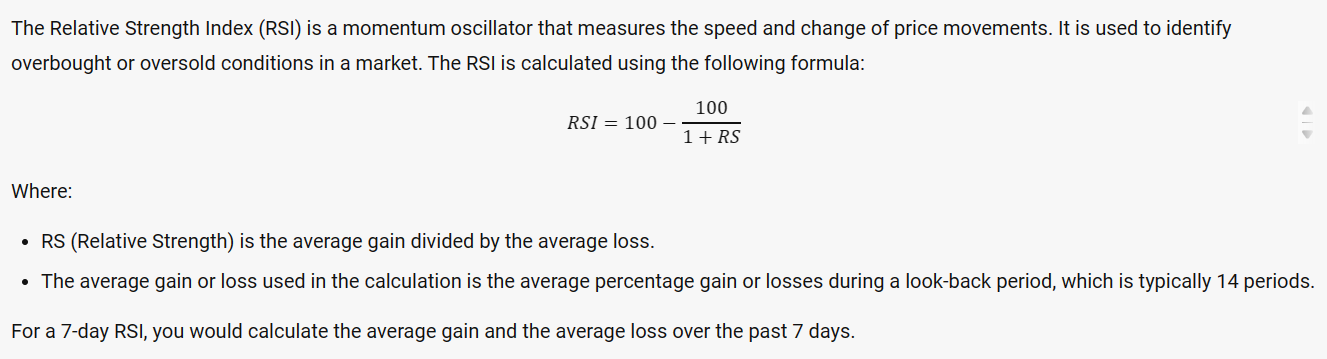

<font size=4>Relative Strength Index, or **RSI**:The RSI calculates how quickly and how much a price moves.Its main application is to determine if a market is overbought or oversold.
The range of RSI readings is 0 to 100. When the RSI is over 70, an asset is often regarded as overbought, and when it is below 30, it is deemed oversold.</font>

In [19]:
%%sql
WITH
-- Daily change in closing price
    daily_change AS (
        SELECT 
            date,
            close,
            ROW_NUMBER() OVER(ORDER BY date) AS row_nr,
            IFNULL(close - LAG(close, 1) OVER(ORDER BY date),0) AS change
        FROM meta_stock_price
),
gains_losses AS (
    SELECT *,
        CASE WHEN change > 0 THEN change ELSE 0 END AS gain,
        CASE WHEN change < 0 THEN ABS(change) ELSE 0 END AS loss
    FROM daily_change
),
avg_gain_losses AS (
    SELECT *,
        CASE 
            WHEN row_nr <= 6 THEN NULL
            WHEN row_nr >= 7 THEN 
                        ROUND(AVG(IFNULL(gain, 0)) OVER(
                         ORDER BY date 
                         ROWS BETWEEN 6 PRECEDING AND CURRENT ROW),6)
        END AS avg_gain,
        CASE 
            WHEN row_nr <= 6 THEN NULL
            WHEN row_nr >= 7 THEN 
                        ROUND(AVG(IFNULL(loss, 0)) OVER(
                         ORDER BY date 
                         ROWS BETWEEN 6 PRECEDING AND CURRENT ROW),6)
        END AS avg_loss
    FROM gains_losses
),
relative_strength AS (
    SELECT *,
        ROUND((avg_gain / avg_loss),6) AS rs
    FROM avg_gain_losses 
),
relative_strength_index AS (
    SELECT *,
        ROUND(100 - (100 / (1 + rs)),6) AS rsi_7
    FROM relative_strength
)

SELECT 
    row_nr,
    date,
    close,
    avg_gain,
    avg_loss,
    rsi_7
FROM relative_strength_index
LIMIT 7 OFFSET 4;


 * sqlite:///meta_2014_2023.db
Done.


row_nr,date,close,avg_gain,avg_loss,rsi_7
5,2014-01-08,58.23,None,None,None
6,2014-01-09,57.220001,None,None,None
7,2014-01-10,57.939999,0.627142,0.165714,79.099105
8,2014-01-13,55.91,0.627142,0.455714,57.915558
9,2014-01-14,57.740002,0.888571,0.434285,67.170652
10,2014-01-15,57.599998,0.511428,0.454286,52.958532
11,2014-01-16,57.189999,0.408572,0.512857,44.341135



<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">5.  Determine the 14-day RSI for Each Stock</h2>
</div>

In [20]:
%%sql
WITH
-- Daily change in closing price
    daily_change AS (
        SELECT 
            date,
            close,
            ROW_NUMBER() OVER(ORDER BY date) AS row_nr,
            IFNULL(close - LAG(close, 1) OVER(ORDER BY date),0) AS change
        FROM meta_stock_price
),
gains_losses AS (
    SELECT *,
        CASE WHEN change > 0 THEN change ELSE 0 END AS gain,
        CASE WHEN change < 0 THEN ABS(change) ELSE 0 END AS loss
    FROM daily_change
),
avg_gain_losses AS (
    SELECT *,
        CASE 
            WHEN row_nr <= 13 THEN NULL
            WHEN row_nr >= 14 THEN 
                        ROUND(AVG(IFNULL(gain, 0)) OVER(
                         ORDER BY date 
                         ROWS BETWEEN 13 PRECEDING AND CURRENT ROW),6)
        END AS avg_gain,
        CASE 
            WHEN row_nr <= 13 THEN NULL
            WHEN row_nr >= 14 THEN 
                        ROUND(AVG(IFNULL(loss, 0)) OVER(
                         ORDER BY date 
                         ROWS BETWEEN 13 PRECEDING AND CURRENT ROW),6)
        END AS avg_loss
    FROM gains_losses
),
relative_strength AS (
    SELECT *,
        ROUND((avg_gain / avg_loss),6) AS rs
    FROM avg_gain_losses 
),
relative_strength_index AS (
    SELECT *,
        ROUND(100 - (100 / (1 + rs)),6) AS rsi_14
    FROM relative_strength
)

SELECT 
    row_nr,
    date,
    close,
    avg_gain,
    avg_loss,
    rsi_14
FROM relative_strength_index
LIMIT 7 OFFSET 11;


 * sqlite:///meta_2014_2023.db
Done.


row_nr,date,close,avg_gain,avg_loss,rsi_14
12,2014-01-17,56.299999,None,None,None
13,2014-01-21,58.509998,None,None,None
14,2014-01-22,57.509998,0.602143,0.402143,59.957331
15,2014-01-23,56.630001,0.602143,0.465,56.425705
16,2014-01-24,54.450001,0.602143,0.61,49.675913
17,2014-01-27,53.549999,0.413571,0.674286,38.017054
18,2014-01-28,55.139999,0.475714,0.674286,41.366443



<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">6.  Calculate the Commodity Channel Index (CCI) For Each Stock with a 7-day Period</h2>
</div>


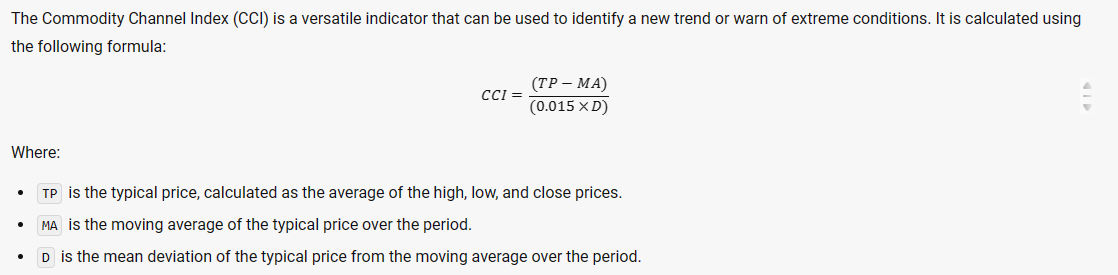

<font size=4>The Commodity Channel Index, or <b>CCI</b>, evaluates an asset's deviation from its statistical mean; it is based on the deviation from the average price. It can be used to identify patterns and variations in the value of an asset. Because CCI is unbounded, it can be greater than 100 or less than -100. In general, values below -100 indicate an oversold instance, while readings above +100 suggest an overbought one.</font>

In [21]:
%%sql
CREATE TEMPORARY TABLE temp_cci7 AS
WITH
    -- Calculating the Average Trading Price for Each Date 
    typical_price AS (
        SELECT 
            date,
            ROW_NUMBER() OVER(ORDER BY date) AS row_nr,
            ROUND((high + low + close)/3, 6) AS tp
        FROM meta_stock_price
        GROUP BY 1
    ),
    -- Calculating the 7-Day Moving Average of Typical Prices
    moving_average AS (
       SELECT *,
        CASE 
            WHEN row_nr <= 6 THEN NULL
            WHEN row_nr >= 7 THEN 
                        ROUND(AVG(IFNULL(TP, 0)) OVER(
                         ORDER BY date 
                         ROWS BETWEEN 6 PRECEDING AND CURRENT ROW),6)
        END AS ma
        FROM typical_price
    ),
    mean_deviation AS (
        SELECT *,
            CASE 
                WHEN row_nr <= 6 THEN NULL
                WHEN row_nr >= 7 THEN 
                        ROUND(AVG(ABS(tp - ma))
                         OVER(
                         ORDER BY date 
                         ROWS BETWEEN 6 PRECEDING AND CURRENT ROW),6)
           END AS mean_dev
            
        FROM moving_average
    ),
    commodity_channel_index AS(
        SELECT *,
            ROUND((tp - ma)/(0.015 * mean_dev),6) AS cci_7
        FROM mean_deviation
    )
    SELECT *
    FROM commodity_channel_index;

 * sqlite:///meta_2014_2023.db
Done.


[]

In [22]:
%%sql
SELECT *
FROM temp_cci7 
LIMIT 5 OFFSET 4;

 * sqlite:///meta_2014_2023.db
Done.


date,row_nr,tp,ma,mean_dev,cci_7
2014-01-08,5,57.956667,None,None,None
2014-01-09,6,57.610001,None,None,None
2014-01-10,7,57.766666,56.717143,1.049523,66.666667
2014-01-13,8,56.513334,56.975238,0.755713,-40.747744
2014-01-14,9,57.206666,57.302857,0.535873,-11.96689



<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">7.  Identify the Day with the Highest CCI_7 value</h2>
</div>


In [23]:
%%sql
SELECT 
    date,
    cci_7 AS highest_cci_7
FROM temp_cci7
WHERE cci_7 = ( 
    SELECT
        MAX(cci_7) 
FROM temp_cci7) ;

 * sqlite:///meta_2014_2023.db
Done.


date,highest_cci_7
2019-01-31,302.743919



    
<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">8.  Calculate the Commodity Channel Index (CCI) for Each Stock with a 14-day Period</h2>
</div>

In [24]:
%%sql
WITH
    -- Calculating the Average Trading Price for Each Date 
    typical_price AS (
        SELECT 
            date,
            ROW_NUMBER() OVER(ORDER BY date) AS row_nr,
            ROUND((high + low + close)/3, 6) AS tp
        FROM meta_stock_price
        GROUP BY 1
    ),
    -- Calculating the 14-Day Moving Average of Typical Prices
    moving_average AS (
       SELECT *,
        CASE 
            WHEN row_nr <= 13 THEN NULL
            WHEN row_nr >= 14 THEN 
                        ROUND(AVG(IFNULL(TP, 0)) OVER(
                         ORDER BY date 
                         ROWS BETWEEN 13 PRECEDING AND CURRENT ROW),6)
        END AS ma
        FROM typical_price
    ),
    mean_deviation AS (
        SELECT *,
            CASE 
                WHEN row_nr <= 13 THEN NULL
                WHEN row_nr >= 14 THEN 
                        ROUND(AVG(ABS(tp - ma))
                         OVER(
                         ORDER BY date 
                         ROWS BETWEEN 13 PRECEDING AND CURRENT ROW),6)
           END AS mean_dev
            
        FROM moving_average
    ),
    commodity_channel_index AS(
        SELECT *,
            ROUND((tp - ma)/(0.015 * mean_dev),6) AS cci_14
        FROM mean_deviation
    )
    
SELECT *
FROM commodity_channel_index
LIMIT 5 OFFSET 11;

 * sqlite:///meta_2014_2023.db
Done.


date,row_nr,tp,ma,mean_dev,cci_14
2014-01-17,12,56.73,None,None,None
2014-01-21,13,57.863333,None,None,None
2014-01-22,14,57.973332,57.033333,0.939999,66.666667
2014-01-23,15,56.333333,57.149524,0.878095,-61.966796
2014-01-24,16,55.09,57.162143,1.276111,-108.253018



<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">9.  Calculate the Simple Moving Average (SMA) for a 50-day Period for Each Stock</h2>
</div>

In [25]:
%%sql
WITH 
    stock_rows AS (
        SELECT 
            ROW_NUMBER() OVER(ORDER BY date) AS row_nr,
            date,
            close
        FROM meta_stock_price
    )
SELECT *,
    CASE 
    WHEN row_nr <= 49 THEN NULL
    WHEN row_nr >= 50 THEN 
    ROUND(AVG(IFNULL(close, 0)) OVER(
            ORDER BY date 
            ROWS BETWEEN 13 PRECEDING AND CURRENT ROW),6)
    END AS sma_50
FROM  stock_rows
LIMIT 5 OFFSET 47;


 * sqlite:///meta_2014_2023.db
Done.


row_nr,date,close,sma_50
48,2014-03-12,70.879997,None
49,2014-03-13,68.830002,None
50,2014-03-14,67.720001,69.606429
51,2014-03-17,68.739998,69.527143
52,2014-03-18,69.190002,69.522143


<div style="background-color:#FFD800; color: black; padding: 10px;">
    <h2 style="text-align: left;">10.  Calculate the Exponential Moving Average (SMA) for a 50-day Period for Each Stock</h2>
</div>

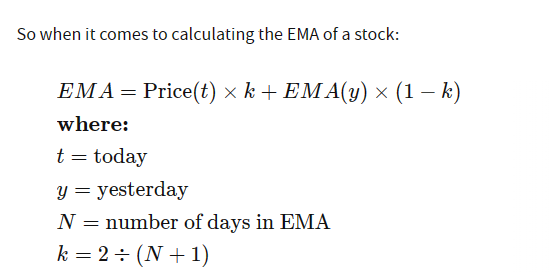

<font size=4 color=red>We use row numbers instead of dates as the dates do not follow a consecutive pattern.</font>

In [26]:
%%sql 
WITH RECURSIVE
  ordered_cp AS (
    SELECT 
      date, 
      close, 
      ROW_NUMBER() OVER (ORDER BY date) as rn
    FROM meta_stock_price
  ),
  ema(rn, date, price, ema) AS (
    SELECT 
      rn, 
      date, 
      close, 
      close -- Initialize EMA with the closing price of the first day
    FROM ordered_cp
    WHERE rn = 1
    UNION ALL
    SELECT 
      ocp.rn,
      ocp.date, 
      ocp.close, 
      ocp.close * (2.0 / (50 + 1)) + e.ema * (1 - 2.0 / (50 + 1)) -- EMA formula
    FROM 
      ordered_cp AS ocp
      JOIN ema AS e 
          ON ocp.rn = e.rn + 1 -- Ensure we're looking at the next row
  )
SELECT 
    date, 
    price, 
    ema 
FROM ema 
ORDER BY date
LIMIT 10;
    

 * sqlite:///meta_2014_2023.db
Done.


date,price,ema
2014-01-02,54.709999,54.709999
2014-01-03,54.560001,54.7041167254902
2014-01-06,57.200001,54.80199454017686
2014-01-07,57.919998,54.924269185660116
2014-01-08,58.23,55.05390568818325
2014-01-09,57.220001,55.13885060237214
2014-01-10,57.939999,55.24869955914186
2014-01-13,55.91,55.27463290976375
2014-01-14,57.740002,55.37131405055733
2014-01-15,57.599998,55.45871342112371


#### 